In [ ]:
# Author: Davidson Siga 
# ID: dsiga
# Some code inspired from Davidson's DSPM class

# All used libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="ticks", color_codes=True)
import re  

import nltk 
nltk.download('stopwords')  
from nltk.corpus import stopwords 
nltk.download('punkt')
nltk.download('wordnet')
import json
import spacy
nlp = spacy.load('en_core_web_sm')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
def twitter_json_to_pdmerge(path='batch2022-04-06.json'):
    file = open(path)
    data = file.read()
    file.close()
    #convert string to  object
    json_object = json.loads(data)
    tweets=pd.DataFrame(json_object['tweets'])
    users=pd.DataFrame(json_object['users'])
    merged_df=tweets.merge(users.rename({'uid': 'uid_r'}, axis=1),left_on='author_id', right_on='uid_r', how='left')
    return merged_df


In [ ]:
new_df=twitter_json_to_pdmerge('/content/drive/MyDrive/TwitterAnalysis/batch2022-04-06.json')


In [ ]:
new_df.shape

(384133, 18)

In [ ]:
nodup_df = new_df.drop_duplicates(subset='tweet', keep="first").reset_index()
nodup_df.shape

(51683, 19)

In [ ]:
nodup_df['user_location']

0                     None
1            Metro Detroit
2                     None
3            United States
4                     None
               ...        
51678                 None
51679               London
51680    York, These Isles
51681             Chaz ⛺️💩
51682                 None
Name: user_location, Length: 51683, dtype: object

In [ ]:
!pip install fuzzywuzzy

In [ ]:
import numpy as np
import pandas as pd
from fuzzywuzzy import fuzz

/usr/local/lib/python3.7/dist-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [ ]:
nodup_df=nodup_df[:1000]

In [ ]:
# numpy array 

In [ ]:
for d in nodup_df.user_location.unique():
    # compute Levensthein distance
    # and set to True if >= a limit
    # (you may have to play around with it)
    nodup_df[d] = nodup_df['user_location'].apply(
        lambda x : fuzz.ratio(x, d) >= 60
    )
    # set a name for the group
    # here, simply the shortest
    m = np.min(nodup_df[nodup_df[d]==True].user_location)
    # assign the group
    nodup_df.loc[nodup_df.user_location==d, 'group'] = m

In [ ]:
# np.array(nodup_df['user_location']).unique

In [ ]:
# Importing the data
# df=pd.read_csv("/content/10K_Pull.csv")
df=nodup_df

In [ ]:
df.head()

,index,tid,author_id,tweet,retweets,replies,likes,quotes,location,created,uid_r,name,username,user_location,followers,following,numTweet,listed,verified
0,0,1517309978046242817,1360560073,"RT @JJKSBEG1N: jungkook supporting small, lgbt...",761,0,0,0,None,22-Apr-2022,1360560073,Foreverflawless,mcmiiJ,None,96,316,98186,12,False
1,1,1517309943975661569,1459650208200024066,RT @FlorioGina: I’m seeing a lot of “don’t mak...,547,0,0,0,None,22-Apr-2022,1459650208200024066,Jeffersonian Liberal,PaulBekemer,Metro Detroit,267,1362,11354,1,False
2,2,1517309878934679555,2880236115,RT @LisaS4680: The same people feeling sorry f...,3,0,0,0,None,22-Apr-2022,2880236115,Bill,sgt_E5,None,1236,1381,86099,0,False
3,4,1517309812324790272,372907147,@elliekaysmith_ We’ll treat the CNN + castaway...,0,0,0,0,None,22-Apr-2022,372907147,Hal Furman,HalFurman,United States,825,1149,45423,13,False
4,11,1517309622578827264,1515283626883227648,RT @DrMeganRx: Recent lifestyle modifications:...,578,0,0,0,None,22-Apr-2022,1515283626883227648,ForkTwatter,ForkTwatter,None,111,266,469,0,False


In [ ]:
# List of columns
df['text']=df['tweet']
df.columns

Index(['index', 'tid', 'author_id', 'tweet', 'retweets', 'replies', 'likes',
       'quotes', 'location', 'created', 'uid_r', 'name', 'username',
       'user_location', 'followers', 'following', 'numTweet', 'listed',
       'verified', 'text'],
      dtype='object')

In [ ]:

# Please change the path before running
# OG_Data = pd.read_csv(path, encoding='latin1')
# # Not sure how to provide relative path, will be great if it could be shared.

# OG_Data.head(10)

In [ ]:
Data_to_Analyse=df

In [ ]:
# Working with the Text
Data_to_Analyse.info()
# No missing


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51683 entries, 0 to 51682
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   index          51683 non-null  int64 
 1   tid            51683 non-null  int64 
 2   author_id      51683 non-null  int64 
 3   tweet          51683 non-null  object
 4   retweets       51683 non-null  int64 
 5   replies        51683 non-null  int64 
 6   likes          51683 non-null  int64 
 7   quotes         51683 non-null  int64 
 8   location       593 non-null    object
 9   created        51683 non-null  object
 10  uid_r          51683 non-null  int64 
 11  name           51683 non-null  object
 12  username       51683 non-null  object
 13  user_location  37373 non-null  object
 14  followers      51683 non-null  int64 
 15  following      51683 non-null  int64 
 16  numTweet       51683 non-null  int64 
 17  listed         51683 non-null  int64 
 18  verified       51683 non-n

In [ ]:
X=Data_to_Analyse['text']
X

0        RT @JJKSBEG1N: jungkook supporting small, lgbt...
1        RT @FlorioGina: I’m seeing a lot of “don’t mak...
2        RT @LisaS4680: The same people feeling sorry f...
3        @elliekaysmith_ We’ll treat the CNN + castaway...
4        RT @DrMeganRx: Recent lifestyle modifications:...
                               ...                        
51678    @Shaneless93 If small businesses are the engin...
51679    Selling off Channel 4, a profit-making publicl...
51680    Reads overly optimistic, but then there's this...
51681    In terms of supporting small businesses in his...
51682    @JueFrangos @KieranMaguire @EFL Yes agreed Der...
Name: text, Length: 51683, dtype: object

Basic Cleaning on tweets

In [ ]:
# ref : https://medium.com/analytics-vidhya/sentiment-analysis-on-amazon-reviews-using-tf-idf-approach-c5ab4c36e7a1

# Code to remove contractions

def contractions(s):
  s = re.sub(r"won’t", "will not",s)
  s = re.sub(r"would’t", "would not",s)
  s = re.sub(r"could’t", "could not",s)
  s = re.sub(r"\’d", " would",s)
  s = re.sub(r"can\’t", "can not",s)
  s = re.sub(r"n\’t", " not", s)
  s = re.sub(r"\’re", " are", s)
  s = re.sub(r"\’s", " is", s)
  s = re.sub(r"\’ll", " will", s)
  s = re.sub(r"\’t", " not", s)
  s = re.sub(r"\’ve", " have", s)
  s = re.sub(r"\’m", " am", s)
  return s

In [ ]:
# Code to clean the data better, this is not yet very twitter specific

processed_texts = []
# ref : https://python.gotrained.com/tf-idf-twitter-sentiment-analysis/

#  Cleaning the text data
for text in range(0, len(X)):  
    # print(X[text])

    # Perform the Contractions on the text
    processed_text = contractions(str(X[text]))

    # Remove all the special characters
    # Keep hashtags RECHECK, keep in sep column
    # processed_text = re.sub(r'\W', ' ', processed_text)
 
    # remove all single characters
    processed_text = re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_text)
 
    # Remove single characters from the start
    processed_text = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_text) 
 
    # Substituting multiple spaces with single space
    processed_text= re.sub(r'\s+', ' ', processed_text, flags=re.I)
 
    # Removing prefixed 'b'
    processed_text = re.sub(r'^b\s+', '', processed_text)
 
    # Converting to Lowercase
    processed_text = processed_text.lower()


    # TWITTER SPECIFIC CLEANING : ref : https://catriscode.com/2021/05/01/tweets-cleaning-with-python/
    # Removing links
    temp = re.sub(r"http\S+", "", processed_text)
    temp = re.sub(r"www.\S+", "", temp)

    # Removing punctuations
    temp = re.sub('[()!?]', ' ', temp)
    temp = re.sub('\[.*?\]',' ', temp)

    # Filtering non-alphanumeric characters
    temp = re.sub("[^a-z0-9]"," ", temp)

    processed_text=temp

 
    processed_texts.append(processed_text)

In [ ]:
Data_to_Analyse['processed_texts']=processed_texts

In [ ]:
Data_to_Analyse.head()

,index,tid,author_id,tweet,retweets,replies,likes,quotes,location,created,...,name,username,user_location,followers,following,numTweet,listed,verified,text,processed_texts
0,0,1517309978046242817,1360560073,"RT @JJKSBEG1N: jungkook supporting small, lgbt...",761,0,0,0,None,22-Apr-2022,...,Foreverflawless,mcmiiJ,None,96,316,98186,12,False,"RT @JJKSBEG1N: jungkook supporting small, lgbt...",rt jjksbeg1n jungkook supporting small lgbt...
1,1,1517309943975661569,1459650208200024066,RT @FlorioGina: I’m seeing a lot of “don’t mak...,547,0,0,0,None,22-Apr-2022,...,Jeffersonian Liberal,PaulBekemer,Metro Detroit,267,1362,11354,1,False,RT @FlorioGina: I’m seeing a lot of “don’t mak...,rt floriogina am seeing lot of do not make ...
2,2,1517309878934679555,2880236115,RT @LisaS4680: The same people feeling sorry f...,3,0,0,0,None,22-Apr-2022,...,Bill,sgt_E5,None,1236,1381,86099,0,False,RT @LisaS4680: The same people feeling sorry f...,rt lisas4680 the same people feeling sorry f...
3,4,1517309812324790272,372907147,@elliekaysmith_ We’ll treat the CNN + castaway...,0,0,0,0,None,22-Apr-2022,...,Hal Furman,HalFurman,United States,825,1149,45423,13,False,@elliekaysmith_ We’ll treat the CNN + castaway...,elliekaysmith we will treat the cnn castaw...
4,11,1517309622578827264,1515283626883227648,RT @DrMeganRx: Recent lifestyle modifications:...,578,0,0,0,None,22-Apr-2022,...,ForkTwatter,ForkTwatter,None,111,266,469,0,False,RT @DrMeganRx: Recent lifestyle modifications:...,rt drmeganrx recent lifestyle modifications ...


Lemmatizations

In [ ]:
# Lemmatization after processing of text
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
Data_to_Analyse['processed_texts']=Data_to_Analyse['processed_texts'].apply(lambda x: " ".join([lemmatizer.lemmatize(w) for w in nltk.word_tokenize(x)]))

In [ ]:
Data_to_Analyse.head(20)

,index,tid,author_id,tweet,retweets,replies,likes,quotes,location,created,...,name,username,user_location,followers,following,numTweet,listed,verified,text,processed_texts
0,0,1517309978046242817,1360560073,"RT @JJKSBEG1N: jungkook supporting small, lgbt...",761,0,0,0,None,22-Apr-2022,...,Foreverflawless,mcmiiJ,None,96,316,98186,12,False,"RT @JJKSBEG1N: jungkook supporting small, lgbt...",rt jjksbeg1n jungkook supporting small lgbtq a...
1,1,1517309943975661569,1459650208200024066,RT @FlorioGina: I’m seeing a lot of “don’t mak...,547,0,0,0,None,22-Apr-2022,...,Jeffersonian Liberal,PaulBekemer,Metro Detroit,267,1362,11354,1,False,RT @FlorioGina: I’m seeing a lot of “don’t mak...,rt floriogina am seeing lot of do not make fun...
2,2,1517309878934679555,2880236115,RT @LisaS4680: The same people feeling sorry f...,3,0,0,0,None,22-Apr-2022,...,Bill,sgt_E5,None,1236,1381,86099,0,False,RT @LisaS4680: The same people feeling sorry f...,rt lisas4680 the same people feeling sorry for...
3,4,1517309812324790272,372907147,@elliekaysmith_ We’ll treat the CNN + castaway...,0,0,0,0,None,22-Apr-2022,...,Hal Furman,HalFurman,United States,825,1149,45423,13,False,@elliekaysmith_ We’ll treat the CNN + castaway...,elliekaysmith we will treat the cnn castaway w...
4,11,1517309622578827264,1515283626883227648,RT @DrMeganRx: Recent lifestyle modifications:...,578,0,0,0,None,22-Apr-2022,...,ForkTwatter,ForkTwatter,None,111,266,469,0,False,RT @DrMeganRx: Recent lifestyle modifications:...,rt drmeganrx recent lifestyle modification can...
5,12,1517309618233516034,1479500611586506768,@IndianaModerate @Staned_Up @JennyCh46223126 @...,0,0,0,0,None,22-Apr-2022,...,James Nicol,DamnedYankeeTN,None,21,253,1678,0,False,@IndianaModerate @Staned_Up @JennyCh46223126 @...,indianamoderate staned up jennych46223126 drst...
6,17,1517309614638997510,2285426058,Their visit included a tour of some of our sma...,0,0,0,0,None,22-Apr-2022,...,Bronx Little Italy,BXLittleItaly,"Bronx, New York",2866,240,8085,53,False,Their visit included a tour of some of our sma...,their visit included tour of some of our small...
7,24,1517309545454145536,234064602,RT @stevol321: Dan Andrews is holding off from...,6,0,0,0,None,22-Apr-2022,...,William J KENT,willicash,"Melbourne, Australia",481,235,56281,7,False,RT @stevol321: Dan Andrews is holding off from...,rt stevol321 dan andrew is holding off from re...
8,30,1517309518593601536,1269848973788901376,AmazonのKindle Unlimitedから\n注目が高い商品をご紹介😄\n\nTre...,0,0,0,0,None,22-Apr-2022,...,あかちゃんとおかあさんのためのアイテムをツイートしたいです😊相互フォローお願いします！,ForBabyAndMom,None,3070,3605,297688,2,False,AmazonのKindle Unlimitedから\n注目が高い商品をご紹介😄\n\nTre...,amazon kindle unlimited treating small busines...
9,33,1517309434573180928,1489028433984122881,RT @Apple: Apple Business Essentials is here. ...,140,0,0,0,None,22-Apr-2022,...,princekwan,princekwan1,None,3,82,143,0,False,RT @Apple: Apple Business Essentials is here. ...,rt apple apple business essential is here it i...


In [ ]:
!pip install yellowbrick

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

from yellowbrick.text import FreqDistVisualizer
from yellowbrick.datasets import load_hobbies


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


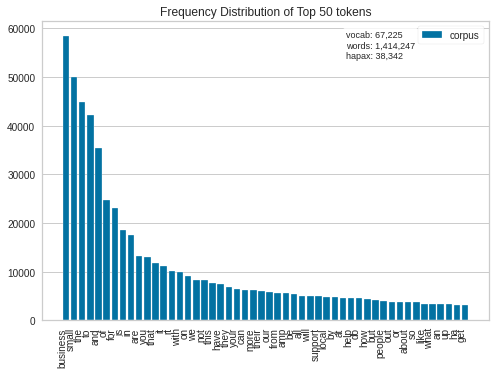

In [ ]:
# VISUALIZING THE TOP WORDS

# Load the text data
vectorizer = CountVectorizer()
docs       = vectorizer.fit_transform(Data_to_Analyse['processed_texts'])
features   = vectorizer.get_feature_names()

visualizer = FreqDistVisualizer(features=features, orient='v')
visualizer.fit(docs)
visualizer.show()

# SO MANY STOP WORDS :), remove.

In [ ]:
nlp.max_length=8776482 

In [ ]:
get_nlp_out=nlp(','.join(Data_to_Analyse['processed_texts'][:100000]))

In [ ]:
# create counts of POS occurrences (adjectives, nouns, verbs,punct)
# CLASS SLIDES
adjs,nouns,verbs=[],[],[]

for token in get_nlp_out:
  if token.text in nlp.Defaults.stop_words: # remove stop words
    continue
  if token.pos_ == 'ADJ':
    adjs.append(token.text)
  elif token.pos_ == 'NOUN':
    nouns.append(token.text)
  elif token.pos_ == 'VERB':
    verbs.append(token.text)


In [ ]:
# ANALYZING FOR PUNCTUATION ON DATA BEFORE CLEANING

from nltk.tokenize import WordPunctTokenizer
punct_tokenizer = WordPunctTokenizer()
punct_tokens = []

for sent in Data_to_Analyse['processed_texts']:
    punct_tokens.append(punct_tokenizer.tokenize(sent))

puncts=[]

flat_list = [item for sublist in punct_tokens for item in sublist]
for token in flat_list:
  if re.match('[^A-Za-z0-9]', token ):
    puncts.append(token)


In [ ]:
# Looking at the punctuations
# The comma and lot of spaces are mostly the most used

from collections import Counter 
top_puncs = Counter(puncts).most_common(20)
top_puncs

# We get .|/|@|: as the top punctuations

In [ ]:
# VISUALIZING THE TOP NOUN WORDS

# Load the text data
vectorizer = CountVectorizer()
docs       = vectorizer.fit_transform(nouns)
features   = vectorizer.get_feature_names()

visualizer = FreqDistVisualizer(features=features, orient='v')
visualizer.fit(docs)
visualizer.show()

# below are the top 50 words, we should remove the top few words from our corpus
# self|car|cars|oo|diving|http|driverless|future|vehicle

In [ ]:
# VISUALIZING THE TOP ADJ WORDS

# Load the text data
vectorizer = CountVectorizer()
docs       = vectorizer.fit_transform(adjs)
features   = vectorizer.get_feature_names()

visualizer = FreqDistVisualizer(features=features, orient='v')
visualizer.fit(docs)
visualizer.show()

# below are the top 50 ADJECTIVE words, we should remove the top few words from our corpus

In [ ]:
# VISUALIZING THE TOP VERBS WORDS

# Load the text data
vectorizer = CountVectorizer()
docs       = vectorizer.fit_transform(verbs)
features   = vectorizer.get_feature_names()

visualizer = FreqDistVisualizer(features=features, orient='v')
visualizer.fit(docs)
visualizer.show()

# below are the top 50 VERBS words, we should remove the top few words from our corpus

In [ ]:
# Stopwords and top wrds removed
# Import stopwords with nltk.
from nltk.corpus import stopwords
stop = stopwords.words('english')
frequent_words='support|co|rt|business|small|year|new|thank|2022|amp'.split('|')
# Removing most freq words from our data
Data_to_Analyse['processed_texts'] = Data_to_Analyse['processed_texts'].apply(lambda x: ' '.join([word for word in x.split() if (word not in stop + frequent_words)]))
Data_to_Analyse.head()

# from now we will use pre_process_new

In [ ]:
# VISUALIZING THE TOP WORDS AGAIN

# Load the text data
vectorizer = CountVectorizer()
docs       = vectorizer.fit_transform(Data_to_Analyse['processed_texts'])
features   = vectorizer.get_feature_names()

visualizer = FreqDistVisualizer(features=features, orient='v')
visualizer.fit(docs)
visualizer.show()

# below are the top 50 words, we should remove the top few words from our corpus
# self|car|cars|oo|diving|http|driverless|future|vehicle|google|the

In [ ]:
nltk.download('averaged_perceptron_tagger')

In [ ]:
from nltk import word_tokenize, pos_tag, pos_tag_sents

texts = Data_to_Analyse['processed_texts'].tolist()
tagged_texts = pos_tag_sents(map(word_tokenize, texts))
Data_to_Analyse['POS'] = tagged_texts

In [ ]:
Data_to_Analyse

In [ ]:
tagged_speech=[Data_to_Analyse['POS'].tolist()]

In [ ]:
from yellowbrick.text.postag import postag
postag(tagged_speech)

In [ ]:
Data_to_Analyse['processed_texts']

In [ ]:
Data_to_Analyse.columns

In [ ]:
# uploadinf the csv to drive
Data_to_Analyse.to_csv('CleanedData10K.csv')

In [ ]:
# import spacy
# from spacy import displacy

# nlp = spacy.load("en_core_web_sm")
# doc = nlp("This is a sentence.")

In [ ]:
# displacy.serve(doc, style="dep")
Data_to_Analyse.head()
Data_to_Analyse['id']

To be done : NER TAGGING

In [ ]:
import spacy
import pandas as pd

df = Data_to_Analyse
nlp = spacy.load('en_core_web_sm')
loc_labels = ['GPE', 'LOC']
ner_locations = []

def get_NER_location(row):
    tweet_id = row['id']
    tweet = row['tweet']
    doc = nlp(tweet)
    for ent in doc.ents:
        if ent.label_ in loc_labels:
            ner_locations.append([tweet_id, ent.text, ent.label_, spacy.explain(ent.label_)])


df.apply(lambda row: get_NER_location(row))
ner_df = pd.DataFrame(ner_locations, columns=['id', 'ent', 'label', 'label_desc'])
merged_df = pd.merge(df, ner_df, on='id', how='outer')

KeyError: ignored